In [205]:
%matplotlib inline

In [206]:
import nltk
#>>> nltk.download('punkt')

from nltk import tokenize



In [207]:
# Dependencies
import tweepy
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import style

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [208]:
# Import data into pandas from CSV
campaign = "data/presidential-campaign-trail/Election Campaign Trail.csv"
df = pd.read_csv(campaign)
df.head()

,Candidate,Date,Location
0,Donald J. Trump,11-Jul-16,"Virginia Beach, Virginia"
1,Donald J. Trump,16-Jul-16,"New York City, New York"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
3,Donald J. Trump,27-Jul-16,"Doral, Florida"
4,Donald J. Trump,5-Aug-16,"Green Bay, Wisconsin"


In [209]:
# Locate all speeches in Ohio
df_ohio = df.loc[df["Location"].str.contains("Ohio")]
df_ohio.head()

,Candidate,Date,Location
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
8,Donald J. Trump,15-Aug-16,"Youngstown, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
17,Donald J. Trump,1-Sep-16,"Wilmington, Ohio"
21,Donald J. Trump,8-Sep-16,"Cleveland, Ohio"


In [210]:
# Find locations in common for speeches in data frame

common_locations = pd.concat(g for _, g in df_ohio.groupby("Location") if len(g) > 1)
common_locations

,Candidate,Date,Location
82,Hillary Clinton,3-Oct-16,"Akron, Ohio"
186,Barack Obama,1-Aug-12,"Akron, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
97,Hillary Clinton,31-Aug-16,"Cincinnati, Ohio"
115,Mitt Romney,1-Sep-12,"Cincinnati, Ohio"
178,Barack Obama,16-Jul-12,"Cincinnati, Ohio"
223,Barack Obama,17-Sep-12,"Cincinnati, Ohio"
266,Barack Obama,4-Nov-12,"Cincinnati, Ohio"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
21,Donald J. Trump,8-Sep-16,"Cleveland, Ohio"


In [211]:
# Drop duplicates for candidates who spoke in the more than once
candidate = common_locations.drop_duplicates(subset = ["Candidate", "Location"])
candidate

,Candidate,Date,Location
82,Hillary Clinton,3-Oct-16,"Akron, Ohio"
186,Barack Obama,1-Aug-12,"Akron, Ohio"
16,Donald J. Trump,1-Sep-16,"Cincinnati, Ohio"
97,Hillary Clinton,31-Aug-16,"Cincinnati, Ohio"
115,Mitt Romney,1-Sep-12,"Cincinnati, Ohio"
178,Barack Obama,16-Jul-12,"Cincinnati, Ohio"
2,Donald J. Trump,21-Jul-16,"Cleveland, Ohio"
88,Hillary Clinton,21-Oct-16,"Cleveland, Ohio"
235,Barack Obama,5-Oct-12,"Cleveland, Ohio"
47,Donald J. Trump,13-Oct-16,"Columbus, Ohio"


In [212]:
# Find locations in common for speeches by candidates (Must be greater than 4 since there are 4 candidates)
cities = candidate.groupby('Location')['Candidate'].count()
cities

Location
Akron, Ohio          2
Cincinnati, Ohio     4
Cleveland, Ohio      3
Columbus, Ohio       3
Delaware, Ohio       2
Kent, Ohio           2
Mansfield, Ohio      2
Springfield, Ohio    2
Toledo, Ohio         3
Name: Candidate, dtype: int64

In [213]:
speech_city = "Cincinnati, Ohio"

In [214]:
print(f"The city with whom all 4 candidates spoke was Cincinnati, Ohio.")

The city with whom all 4 candidates spoke was Cincinnati, Ohio.


In [215]:
# Placeholder for strings
trump = ""
clinton = ""
romney = ""
obama = ""

# Open each of the samples
with open("data/presidential-campaign-trail/Trump.txt", encoding='utf-8') as sample:
    trump = sample.read()

with open("data/presidential-campaign-trail/Clinton.txt", encoding='utf-8') as sample:
    clinton = sample.read()

with open("data/presidential-campaign-trail/Romney.txt", encoding='utf-8') as sample:
    romney = sample.read()
    
with open("data/presidential-campaign-trail/Obama.txt", encoding='utf-8') as sample:
    obama = sample.read()
    

In [216]:

# Run Vader Sentiment Analysis on Each of the Samples (Using NLTK for analyzing longer texts)
samples = (trump, clinton, romney, obama)
my_list = ["Trump","Clinton","Romney", "Obama"]
resultlist=[]

maxpos=0
maxneg=0

for sample in samples:
    scores = []
    politicianlist=["positive","negative"]
    sentence_list = tokenize.sent_tokenize(sample)
    paragraphSentiments = 0.0
    
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        #print("{:-<65} {}".format(sentence, str(vs["compound"])))
        paragraphSentiments += vs["compound"]
        if (vs["compound"]>maxpos):
            politicianlist[0]=sentence
            maxpos=vs["compound"]
        if (vs["compound"]<maxneg):
            politicianlist[1]=sentence
            maxneg=vs["compound"]
    resultlist.append(politicianlist)
    
    # Run Vader Analysis on each Sample
    print(" Average sentiment of speeches :\t" + str(round(paragraphSentiments / len(sentence_list), 9)))
    print("----------------------------------------------------")
    print("----------------------------------------------------")
    
    #results = analyzer.polarity_scores(sample)
    overall = vs["compound"]
    pos = vs["pos"]
    neu = vs["neu"]
    neg = vs["neg"]

    # Print Samples and Analysis
for i in resultlist:   
    print (i)
            
        


    

 Average sentiment of speeches :	0.358519118
----------------------------------------------------
----------------------------------------------------
 Average sentiment of speeches :	0.162891406
----------------------------------------------------
----------------------------------------------------
 Average sentiment of speeches :	0.274945745
----------------------------------------------------
----------------------------------------------------
 Average sentiment of speeches :	0.151687567
----------------------------------------------------
----------------------------------------------------
['We will make sure our soldiers, sailors, airmen and marines have the best equipment, training and tools in the world – and we will ensure that they have the best medical care in the world, both in service, and when they return home as civilians.', 'We are going to end the era of nation-building, and create a new foreign policy – joined by our partners in the Middle East – that is focused on 

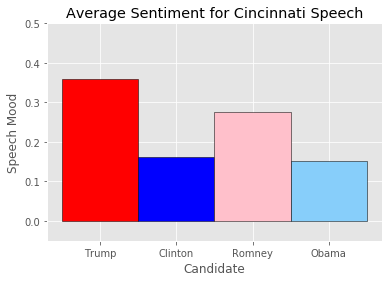

In [217]:
style.use("ggplot")
df = pd.DataFrame({
    "Candidate":["Trump","Clinton","Romney","Obama"],
    "Sentiment":[0.358519118,0.162891406,0.274945745,0.151687567]
})
df = df.set_index("Candidate")

# Create a bar chart
plt.bar(0, (0.35851911), edgecolor = "black", color="red", width=1)
plt.bar(1, (0.162891406), edgecolor = "black", color="blue", width=1)
plt.bar(2, (0.274945745), edgecolor = "black", color="pink", width=1)
plt.bar(3, (0.151687567), edgecolor = "black", color="lightskyblue", width=1)


# Incorporate other plot features
plt.title("Average Sentiment for Cincinnati Speech")
plt.ylim(-0.05, 0.50)
plt.xlabel("Candidate")
plt.ylabel("Speech Mood")
x_labels = ["Trump", "Clinton", "Romney", "Obama"]
x_locations = [value for value in np.arange(4)]
plt.xticks(x_locations, x_labels)
 

#Adds a horizontal line at zero
plt.grid(True)

# Save file to Output folder
plt.savefig("Charts/Average Sentiment for Cincinnati Speech")

plt.show()